# Subspace Digital Twin, Sanity Checking Run

*Danilo Lessa Bernardineli, November 2023*

On this notebook, we do an sanity checking run (which is a single run) so that basic metrics and KPIs
for the simulation are computed.

## Part 1. Dependences & Set-up

In [29]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import panel as pn
import seaborn as sns
pn.extension()
pn.state.clear_caches()

pio.renderers.default = "png" # For GitHub rendering

## Part 2. Simulation set-up & execution

In [30]:
from subspace_model.experiments.experiment import sanity_check_run
sim_df = sanity_check_run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 701, 39, 2, 36)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (701, 39, 2, 36)


Initializing configurations:   0%|          | 0/2 [00:00<?, ?it/s]

Execution Method: local_simulations
Execution Mode: parallelized


Flattening results:   0%|          | 0/2 [00:00<?, ?it/s]

Total execution time: 12.32s


In [31]:
sim_df.head(5)

,days_passed,delta_days,delta_blocks,circulating_supply,user_supply,issued_supply,sum_of_stocks,block_utilization,dsf_relative_disbursal_per_day,reward_issuance_balance,...,base_fee_function,priority_fee_function,compute_weights_per_tx_function,compute_weight_per_bundle_function,transaction_size_function,bundle_size_function,transaction_count_per_day_function,bundle_count_per_day_function,slash_per_day_function,new_sectors_per_day_function
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.320000e+09,...,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>
13,1,1.0,14400.0,1000.000000,1000.000000,1000.0,3.000000e+09,0.000013,0.0,1.319999e+09,...,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>
26,2,1.0,14400.0,1999.999157,1999.999157,2000.0,3.000000e+09,0.000008,0.0,1.319998e+09,...,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>
39,3,1.0,14400.0,2999.988532,2999.998530,3000.0,3.000000e+09,0.000004,0.0,1.319997e+09,...,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>
52,4,1.0,14400.0,3999.947912,3999.996858,4000.0,3.000000e+09,0.000014,0.0,1.319996e+09,...,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>,function: <lambda>


## Part 3. Visualizations

On this section, we'll visualize some base metrics on the simulations results

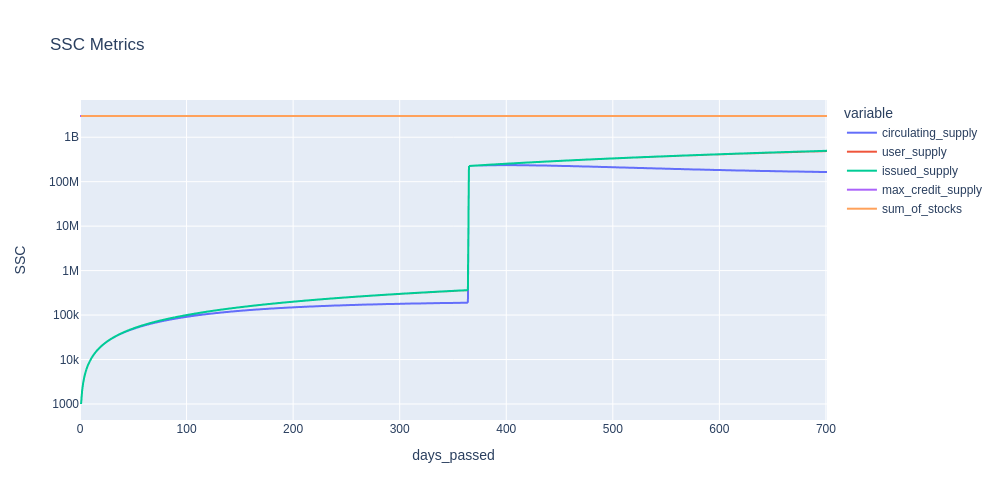

In [53]:
## both deterministic and stochastic are plotted but not distinguishable
fig = px.line(
    sim_df,#[sim_df["label"] == "deterministic"],
    x="days_passed",
    y=[el for el in sim_df.columns if "supply" in el] + ["sum_of_stocks"],
    title="SSC Metrics",
    labels={"value": "SSC"},
    log_y=True,
    # color="label",
)
fig.update_layout(width=1000, height=500)
fig.show()

In [ ]:
fig = px.line(sim_df, x='days_passed', 
        y=[el for el in sim_df.columns if "shares" in el],
        log_y=True,
        labels={'value': 'Staking Pool Shares'},
        title='Aggregate Staking Pool share composition'
        )
fig.update_layout(width=1000, height=500)
fig.show()

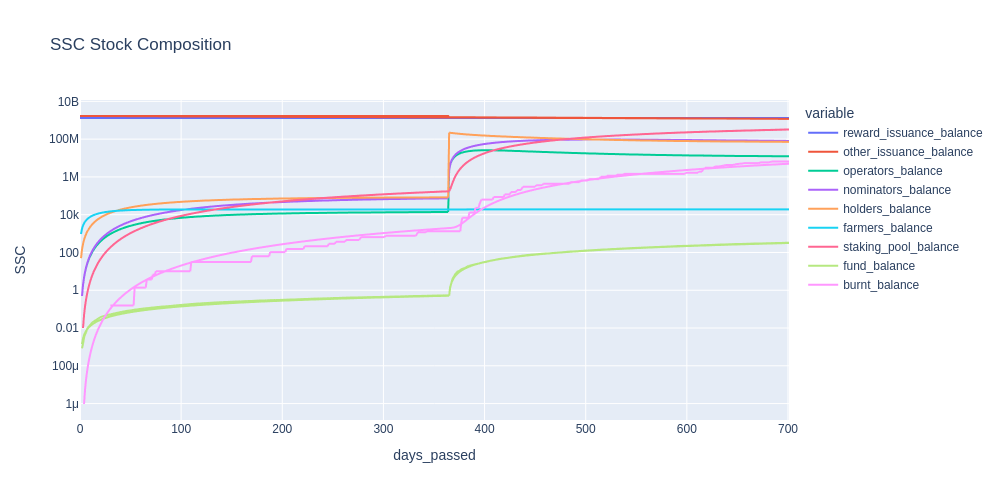

In [41]:
fig = px.line(sim_df, x='days_passed', 
        y=[el for el in sim_df.columns if "_balance" in el],
        title='SSC Stock Composition',
        labels={'value': 'SSC'},
        log_y=True)
fig.update_layout(width=1000, height=500)
fig.show()

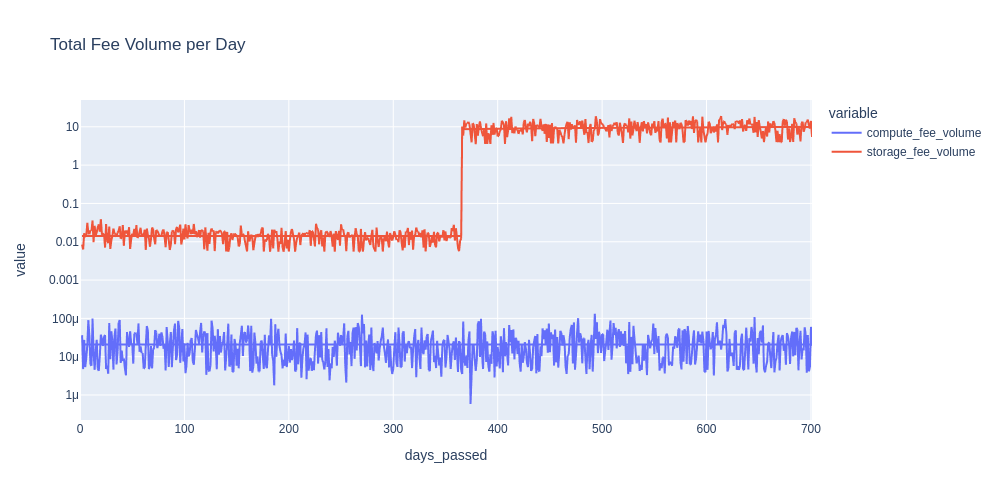

In [42]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=[el for el in sim_df.columns if "volume" in el],
        title='Total Fee Volume per Day',
        log_y=True)
fig.update_layout(width=1000, height=500)
fig.show()

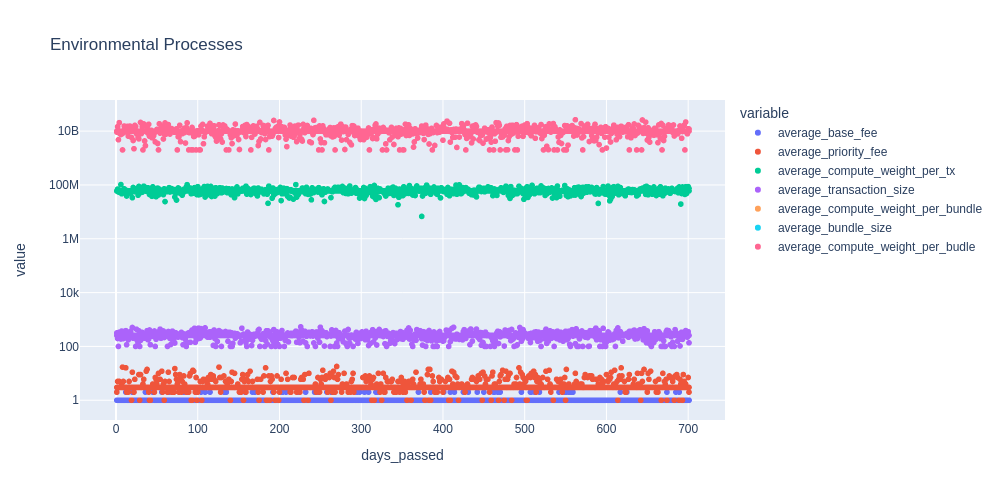

In [43]:
fig_df = sim_df.melt(id_vars=['days_passed'], value_vars=[el for el in sim_df.columns if "average" in el])


fig = px.scatter(fig_df, 
        x='days_passed', 
        y='value',
        color='variable',
        title='Environmental Processes',
        log_y=True)

fig.update_layout(width=1000, height=500)
fig.show()

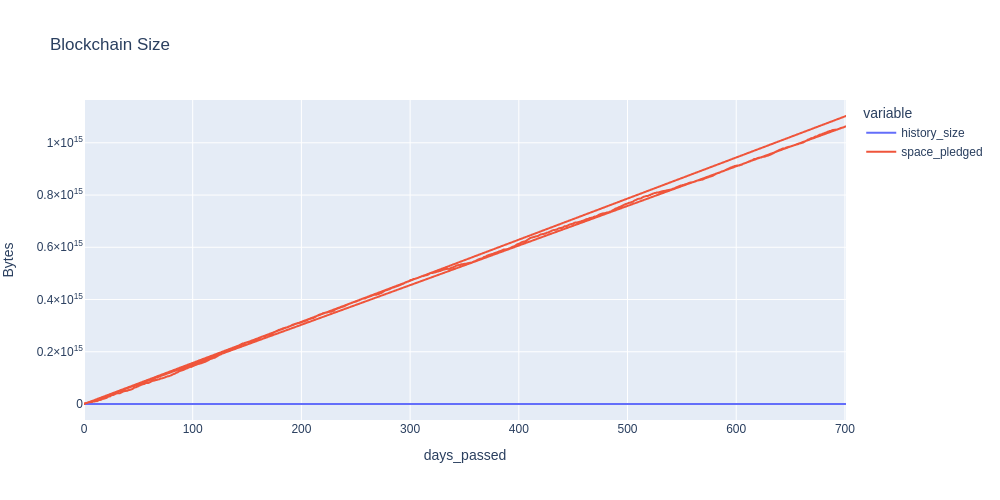

In [44]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=['history_size', 'space_pledged'],
        title='Blockchain Size',
        labels={'value': 'Bytes'})
fig.update_layout(width=1000, height=500)
fig.update_yaxes(matches=None, showticklabels=True)
fig.show()

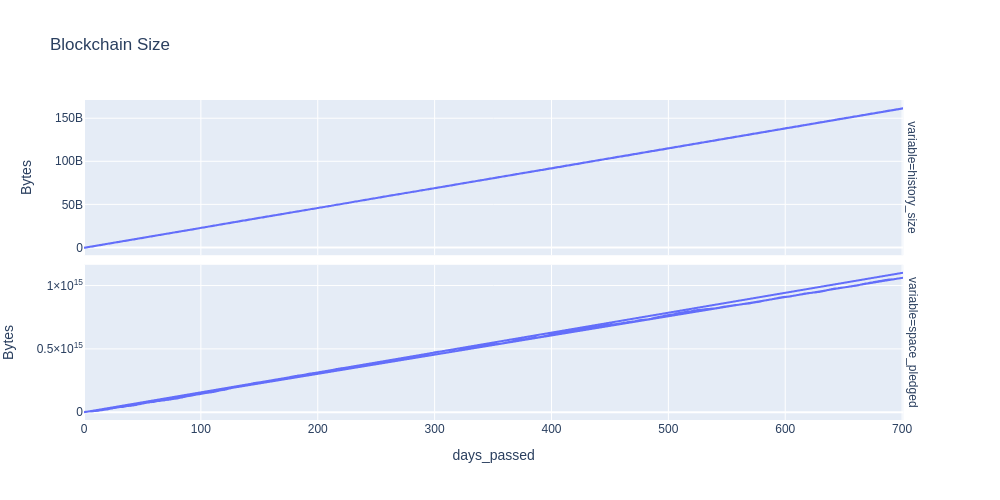

In [45]:
fig_df = sim_df.melt(id_vars=['days_passed'], 
                     value_vars=['history_size', 'space_pledged'])

fig = px.line(fig_df, 
        x='days_passed', 
        y='value',
        facet_row='variable',
        title='Blockchain Size',
        labels={'value': 'Bytes'})
fig.update_layout(width=1000, height=500)
fig.update_yaxes(matches=None, showticklabels=True)
fig.show()

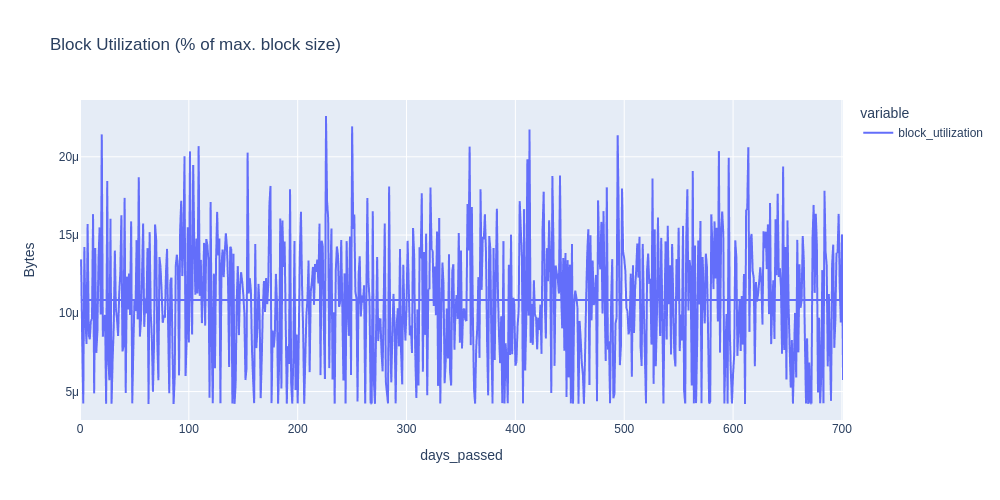

In [46]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=['block_utilization'],
        title='Block Utilization (% of max. block size)',
        labels={'value': 'Bytes'})
fig.update_layout(width=1000, height=500)
fig.show()

### Scoped KPIs

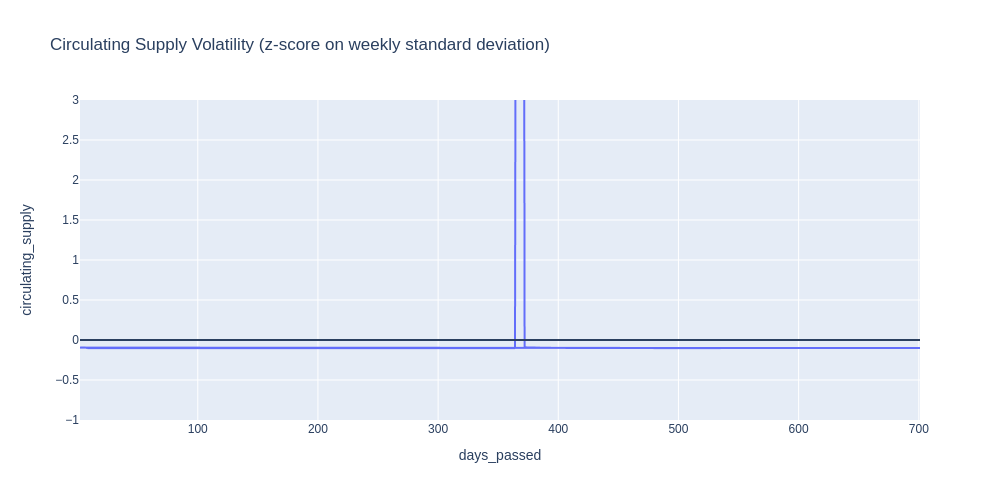

In [47]:
from subspace_model.trajectory_metrics import *
m_df = sim_df.set_index('days_passed')
s = window_volatility(m_df.circulating_supply.diff()).reset_index()

fig = px.line(s, 
        x='days_passed', 
        y='circulating_supply',
        title='Circulating Supply Volatility (z-score on weekly standard deviation)')
fig.add_hline(0)
fig.update_layout(width=1000, height=500, yaxis_range=[-1, 3])
fig.show()

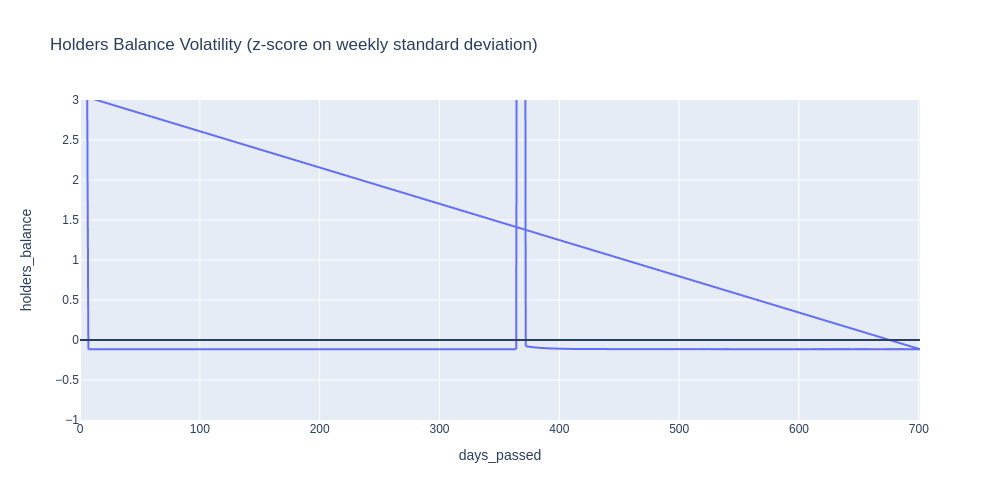

In [48]:
from subspace_model.trajectory_metrics import *
m_df = sim_df.set_index('days_passed')
s = window_volatility(m_df.holders_balance.diff()).reset_index()

fig = px.line(s, 
        x='days_passed', 
        y='holders_balance',
        title='Holders Balance Volatility (z-score on weekly standard deviation)')
fig.add_hline(0)
fig.update_layout(width=1000, height=500, yaxis_range=[-1, 3])
fig.show()

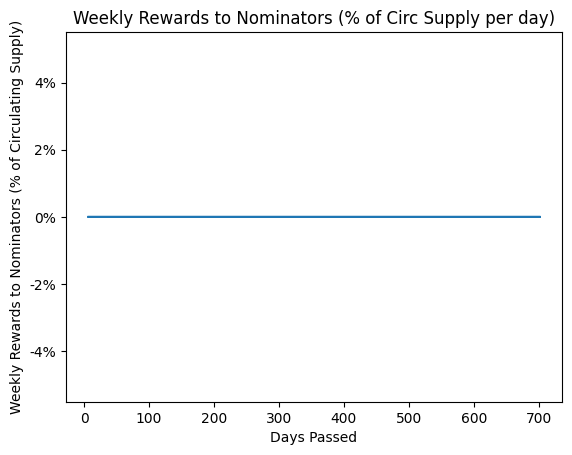

In [49]:
n_days = 7
fig_df = sim_df.set_index('days_passed')
s = fig_df.rewards_to_nominators.rolling(n_days).sum() / fig_df.circulating_supply.rolling(n_days).mean()
ax = s.plot()
plt.title("Weekly Rewards to Nominators (% of Circ Supply per day)")
plt.xlabel('Days Passed')
plt.ylabel('Weekly Rewards to Nominators (% of Circulating Supply)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.show()

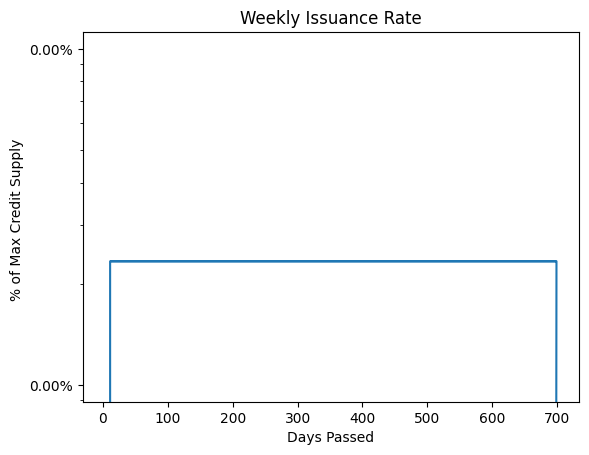

In [50]:
n = 7
s = fig_df.reward_issuance_balance.diff() * -1.0
s /= fig_df.max_credit_supply
s = s.rolling(n).sum()[n-1::n]

ax = s.plot(x='days_passed', y='reward_issuance_balance', logy=True)
plt.title("Weekly Issuance Rate")
plt.xlabel('Days Passed')
plt.ylabel('% of Max Credit Supply ')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
plt.show()

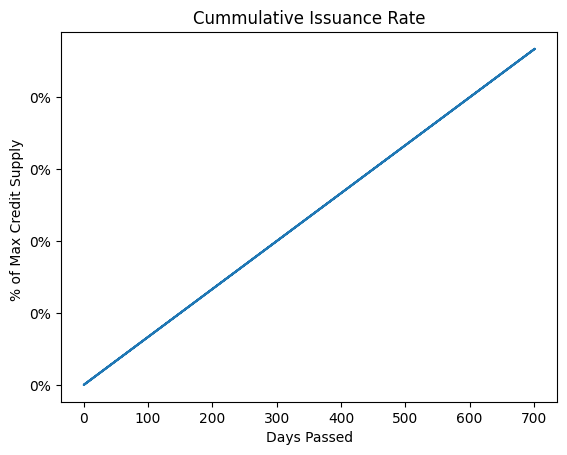

In [51]:
n = 7
s = fig_df.reward_issuance_balance.diff() * -1.0
s /= fig_df.max_credit_supply
s = s.cumsum()

ax = s.plot(x='days_passed', y='reward_issuance_balance')
plt.title("Cummulative Issuance Rate")
plt.xlabel('Days Passed')
plt.ylabel('% of Max Credit Supply ')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.show()